In [3]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

In [4]:
        #Whale Returns
#Read the Whale Portfolio daily returns and clean the data
whale_returns_path= Path("whale_returns.csv")
whale_returns= pd.read_csv(whale_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [5]:
 # Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
  # Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [20]:
#Algorithmic Daily Returns
#Read the algorithmic daily returns and clean the data
algo_returns_path= Path("algo_returns.csv")
algo_returns= pd.read_csv(algo_returns_path, index_col="Date", parse_dates=True, infer_datetime_format=True )
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [21]:
# Count nulls
algo_returns.isnull().sum()

  # Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [23]:
 #S&P 500 Returns
#Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data.

sp500_history_path= Path("sp500_history.csv")
sp500_data= pd.read_csv(sp500_history_path, index_col="Date", parse_dates= True, infer_datetime_format=True)
sp500_data.sort_index(ascending= True, inplace= True)
sp500_data.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [27]:
# Check Data Types and fix them
sp500_data.dtypes

Close    object
dtype: object

In [29]:
sp500_data["Close"]= sp500_data["Close"].str.replace('$','').astype("float")
sp500_data.sort_index(inplace = True)
sp500_data.head(10)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48
2012-10-10,1432.56
2012-10-11,1432.84


In [47]:
# Calculate Daily Returns
sp500_daily_returns = sp500_data.pct_change()
sp500_daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [48]:
 # Drop nulls
sp500_daily_returns.dropna(inplace=True)
sp500_daily_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [59]:
# Rename `Close` Column to be specific to this portfolio.
sp500_daily_returns.columns = ["SP500"]
sp500_daily_returns.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [61]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
daily_returns_df= pd.concat([sp500_daily_returns, algo_returns, whale_returns], axis ="columns", join="inner")
daily_returns_df.head()

,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,,,
2015-03-03,-0.004539,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,-0.004389,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.001196,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.014174,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.003944,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652


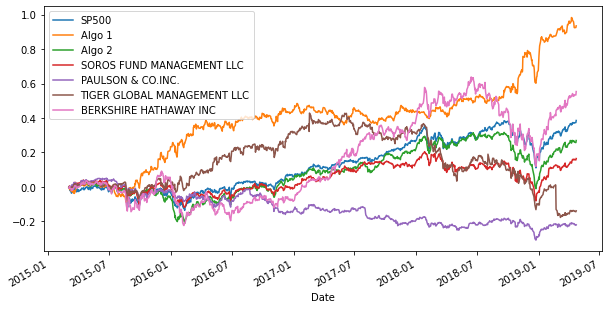

In [68]:
# Calculate cumulative returns of all portfolios
cum_returns_df= ( 1 + daily_returns_df).cumprod() -1
# Plot cumulative returns
cum_returns_df.plot(figsize = (10,5))

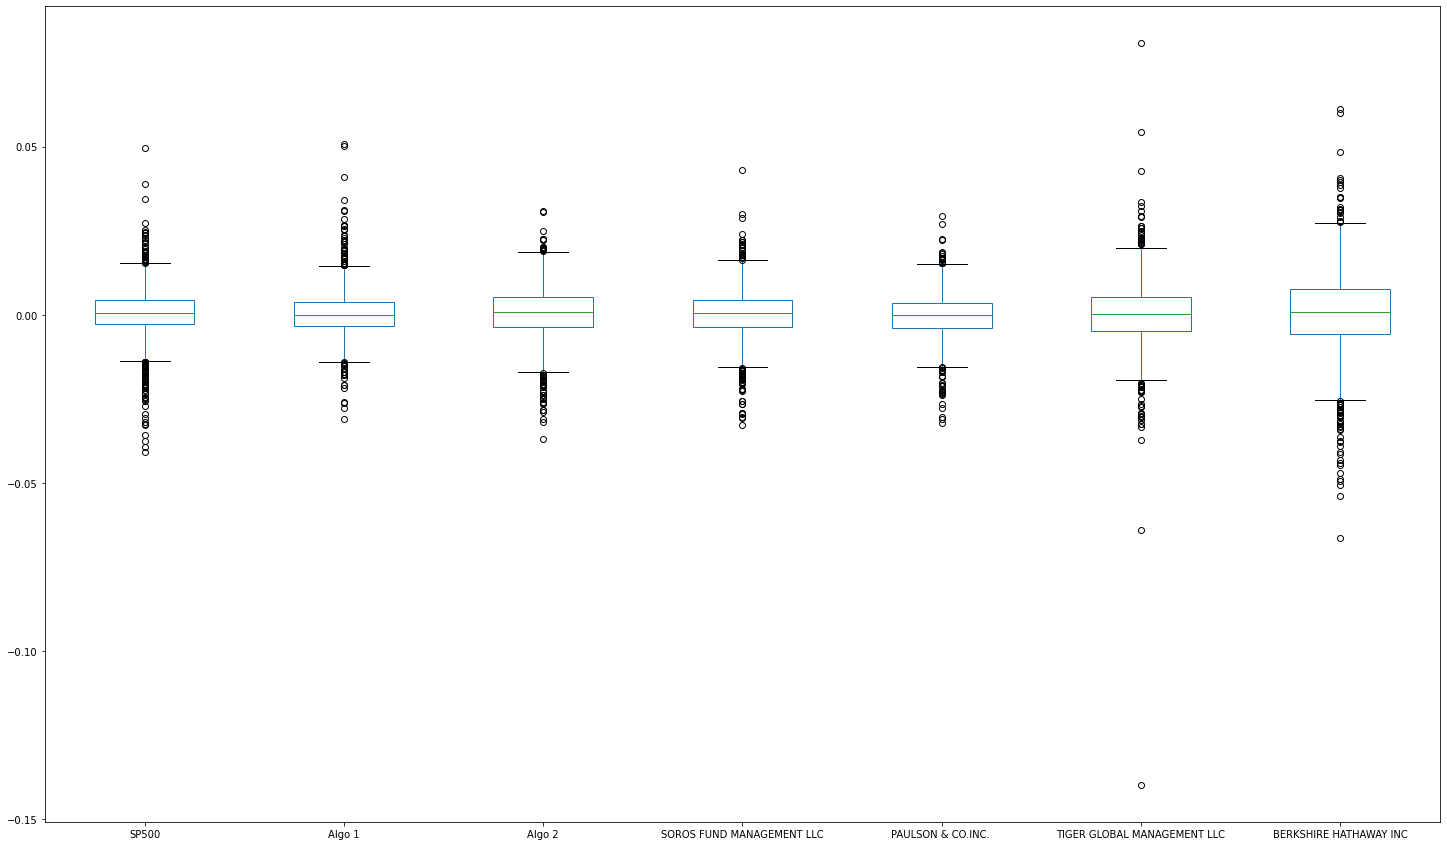

In [76]:
 # Box plot to visually show risk
daily_returns_df.plot(kind="box", figsize = (25,15))

In [96]:
 # Calculate the daily standard deviations of all portfolios
daily_std =pd.DataFrame(daily_returns_df.std())
daily_std.columns=["std"]
daily_std

,std
SP500,0.008554
Algo 1,0.007620
Algo 2,0.008342
SOROS FUND MANAGEMENT LLC,0.007895
PAULSON & CO.INC.,0.007023
TIGER GLOBAL MANAGEMENT LLC,0.010894
BERKSHIRE HATHAWAY INC,0.012919


In [98]:
#TIGER GLOBAL MANAGEMENT LLC & BERKSHIRE HATHAWAY INC have higher STD so they are "riskier"

In [99]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)
annualized_std

,std
SP500,0.135786
Algo 1,0.120967
Algo 2,0.132430
SOROS FUND MANAGEMENT LLC,0.125335
PAULSON & CO.INC.,0.111488
TIGER GLOBAL MANAGEMENT LLC,0.172936
BERKSHIRE HATHAWAY INC,0.205077


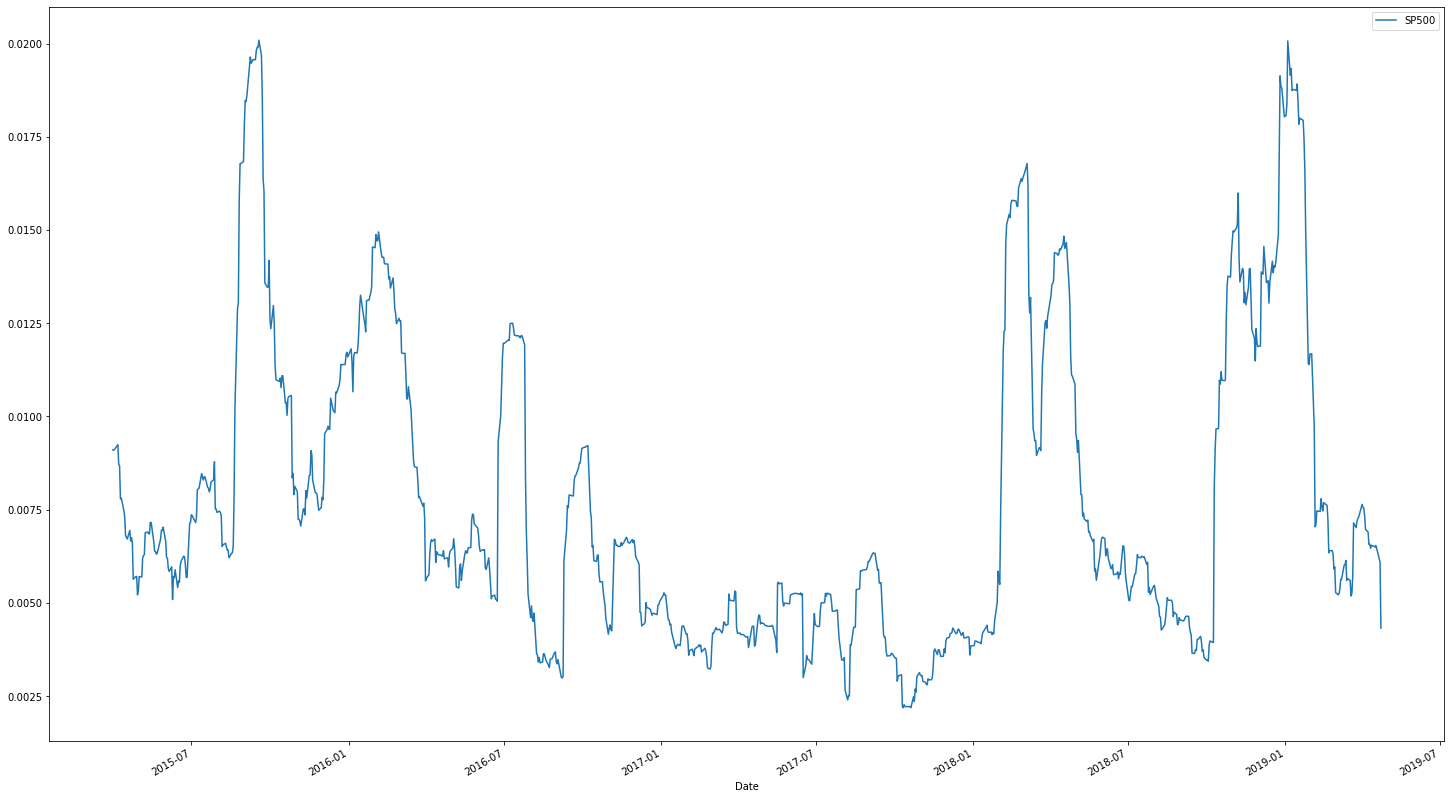

In [108]:
 # Calculate the rolling standard deviation for all portfolios using a 21-day window
sp500_rolling_21 = daily_returns_df[["SP500"]].rolling(window = 21).std()

# Plot the rolling standard deviation
sp500_rolling_21.plot(figsize = (25,15))

In [113]:
# Calculate the correlation
correlation=daily_returns_df.corr()
# Display de correlation matrix
correlation


,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
SP500,1.000000,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371
Algo 1,0.279494,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033
Algo 2,0.858764,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082
SOROS FUND MANAGEMENT LLC,0.837864,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360
PAULSON & CO.INC.,0.669732,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623
TIGER GLOBAL MANAGEMENT LLC,0.623946,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423
BERKSHIRE HATHAWAY INC,0.751371,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000


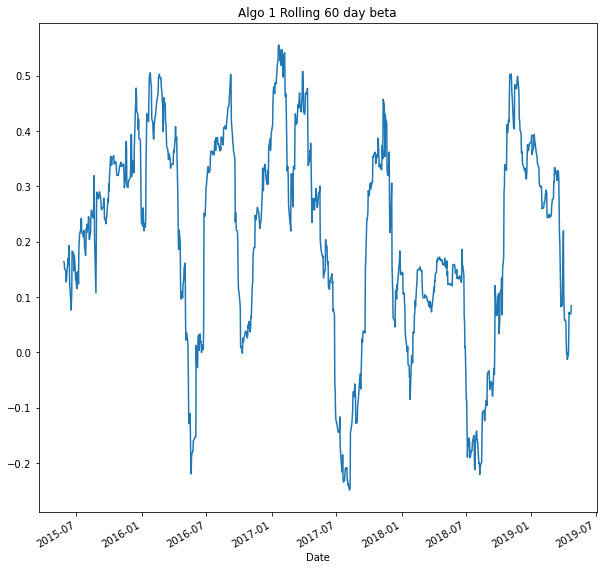

In [122]:
# Calculate covariance of a single portfolio
covariance = daily_returns_df["Algo 1"].rolling(window=60).cov(daily_returns_df['SP500'])

# Calculate variance of S&P 500
variance=daily_returns_df['SP500'].rolling(window=60).var()


# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(10, 10), title='Algo 1 Rolling 60 day beta')

In [123]:
#Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot
 # Annualized Sharpe Ratios
sharpe_ratios = daily_returns_df.mean()*252/(daily_returns_df.std()*np.sqrt(252))
print(sharpe_ratios)

SP500                          0.648267
Algo 1                         1.378648
Algo 2                         0.501364
SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
dtype: float64


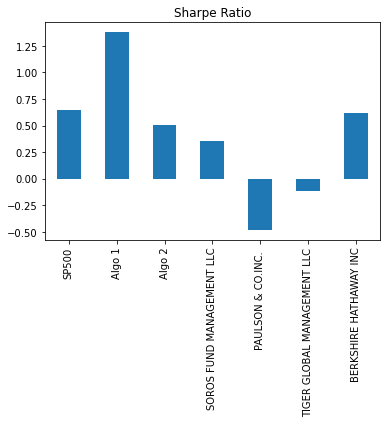

In [125]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratio")

In [159]:
# Reading data from 1st stock and clean it up
google_path= Path("google_data.csv")
goog_df= pd.read_csv(google_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
goog_df= goog_df.drop(columns=["Symbol"])
goog_df.rename(columns = {"NOCP":"GOOG"}, inplace = True)
goog_df.head()

,GOOG
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [160]:
# Reading data from 2nd stock and clean it up
    
aapl_path= Path("aapl_data.csv")
aapl_df= pd.read_csv(aapl_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df= aapl_df.drop(columns=["Symbol"])
aapl_df.rename(columns = {"NOCP":"AAPL"}, inplace = True)
aapl_df.head()    

,AAPL
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [161]:
# Reading data from 3rd stock and clean it up

cost_path= Path("costco_data.csv")
cost_df= pd.read_csv(cost_path, index_col="Trade DATE", parse_dates=True, infer_datetime_format=True)
cost_df=cost_df.drop(columns=["Symbol"])
cost_df.rename(columns = {"NOCP":"COST"}, inplace = True)
cost_df.head()

,COST
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [163]:
# Combine all stocks in a single DataFrame
stock_picks = pd.concat((aapl_df, cost_df, goog_df), axis = 1, join= "inner")
stock_picks.sort_index(ascending = True, inplace = True)
stock_picks.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [164]:
# Reset the Date index
stock_picks.index = stock_picks.index.normalize()
stock_picks.head()

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [168]:
 # Calculate daily returns
daily_returns= stock_picks.pct_change()
# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns

,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


In [171]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio=stock_picks.dot(weights)
portfolio_returns= portfolio.pct_change()
portfolio_returns.dropna(inplace = True)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.001093
2018-05-15   -0.015550
2018-05-16    0.005140
2018-05-17   -0.002370
2018-05-18   -0.009248
dtype: float64

In [176]:
# Join your returns DataFrame to the original returns DataFrame
final_portfolio_returns = pd.concat((portfolio_returns,daily_returns_df), axis = 1, join = "inner")
final_portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace = True)
final_portfolio_returns.head()

,My Portfolio,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2018-05-14,0.001093,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000
2018-05-15,-0.015550,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.005140,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.002370,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140
2018-05-18,-0.009248,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212


In [179]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_portfolio_returns.dropna(inplace=True)
final_portfolio_returns.head()


,My Portfolio,SP500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
2018-05-14,0.001093,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000
2018-05-15,-0.015550,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606
2018-05-16,0.005140,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310
2018-05-17,-0.002370,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140
2018-05-18,-0.009248,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212


In [181]:
 # Calculate the annualized `std`
portfolio_std =pd.DataFrame(final_portfolio_returns.std())
portfolio_std.columns=["std"]
portfolio_std

,std
My Portfolio,0.014413
SP500,0.009578
Algo 1,0.008423
Algo 2,0.008791
SOROS FUND MANAGEMENT LLC,0.009240
PAULSON & CO.INC.,0.007353
TIGER GLOBAL MANAGEMENT LLC,0.014648
BERKSHIRE HATHAWAY INC,0.015569


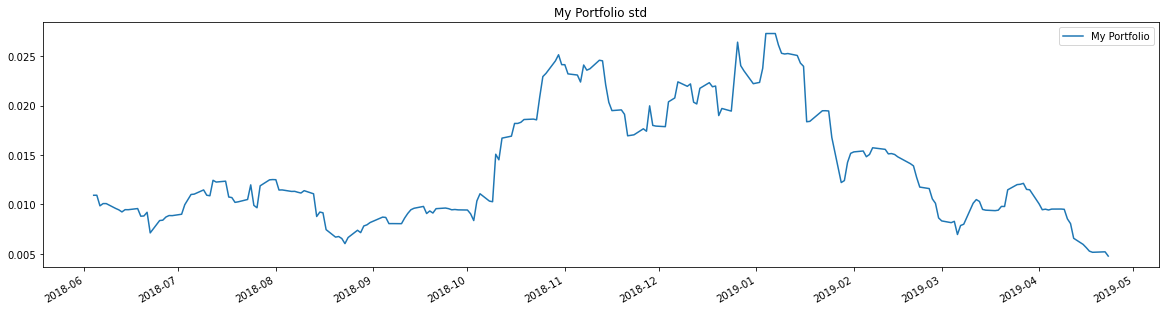

In [189]:
# Calculate and plot Rolling STD with 21 days
final_portfolio_rolling_21_std = final_portfolio_returns[["My Portfolio"]].rolling(window = 15).std()
final_portfolio_rolling_21_std.plot(figsize =(20,5),title= "My Portfolio std")


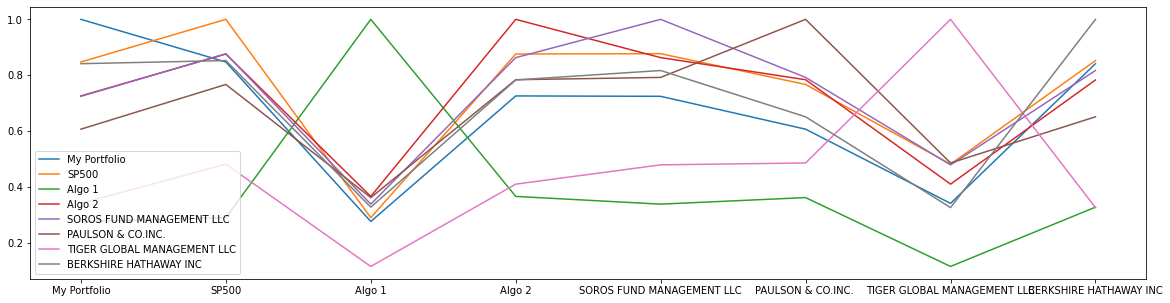

In [194]:
 # Calculate and plot the correlation
portfolio_correlation= final_portfolio_returns.corr()
portfolio_correlation.plot(figsize= (20,5))

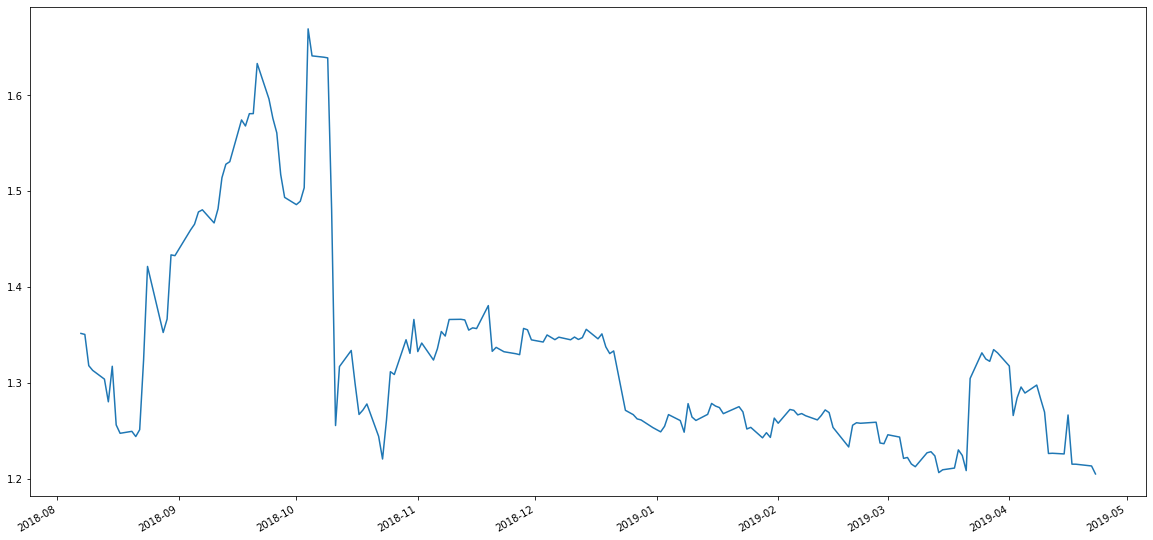

In [199]:
#Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500
rolling_covariance = final_portfolio_returns['My Portfolio'].rolling(window=60).cov(final_portfolio_returns["SP500"])
rolling_variance = final_portfolio_returns["SP500"].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10))

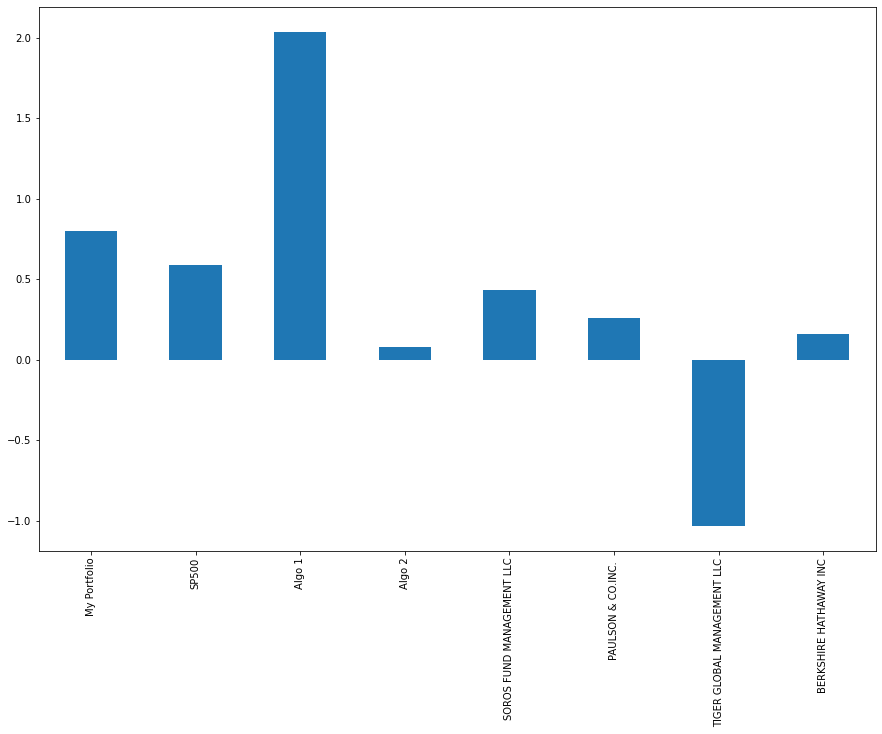

In [209]:
 # Calculate Annualzied Sharpe Ratios
sharpe_ratios = final_portfolio_returns.mean()*252/(final_portfolio_returns.std()*np.sqrt(252))
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", figsize=(15,10))

In [213]:
#How does your portfolio do?
''' My "portfolio" performed pretty well. It performed better than all the portfolios except Algo 1. It was also the third highest standard deviation as well as a rolling beta constantly over one. This means that it is extremely volatile'''

' My "portfolio" performed pretty well. It performed better than all the portfolios except Algo 1. It was also the third highest standard deviation as well as a rolling beta constantly over one. This means that it is extremely volatile'